Data Set Description¶
Encounter ID Unique identifier of an encounter

Patient number Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight Weight in pounds

Admission type Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital Integer number of days between admission and discharge

Payer code Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
Medical specialty Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures Number of lab tests performed during the encounter

Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications Number of distinct generic names administered during the encounter

Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days,
“>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
diab=pd.read_csv("diabetic_data.csv")

In [36]:
diabet = diab.replace("?",np.nan)

In [37]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


C:\Users\Harsha S\AppData\Local\Temp\ipykernel_38352\1595005390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet = diabet.replace({"NO":0,


readmitted
0    90409
1    11357
Name: count, dtype: int64


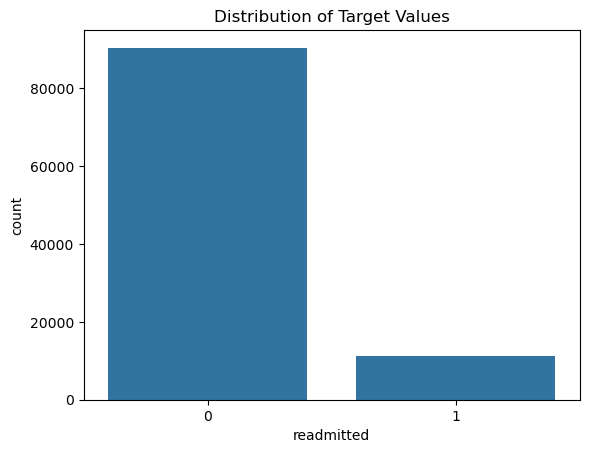

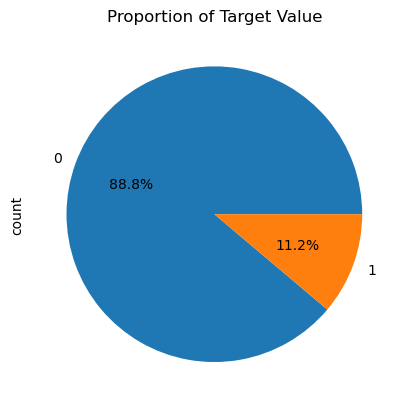

In [38]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabet.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabet)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabet.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

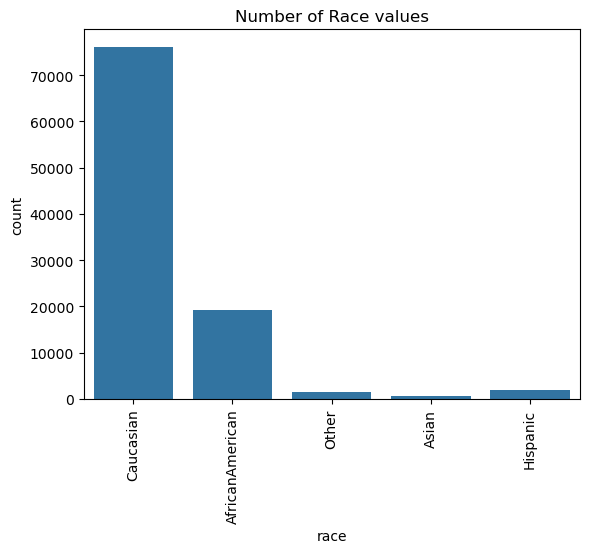

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


In [39]:
sns.countplot(x=diabet.race, data = diabet)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

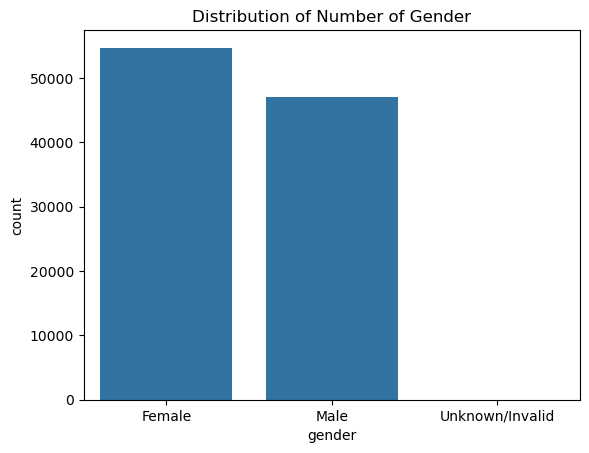

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


In [40]:
sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabet.gender.value_counts(normalize = True))

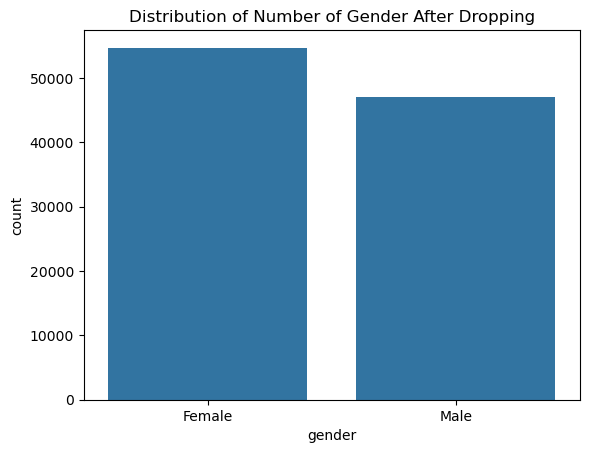

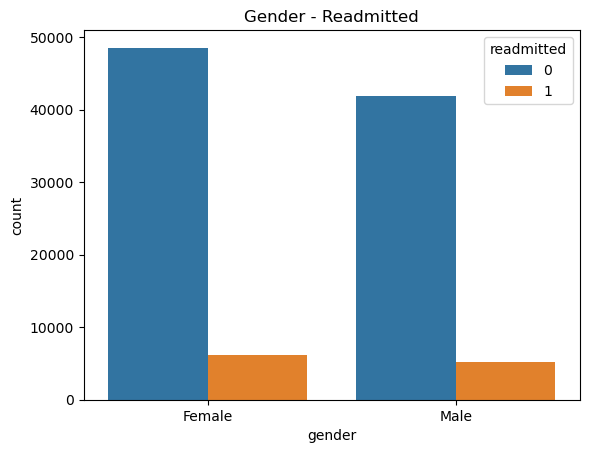

In [48]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

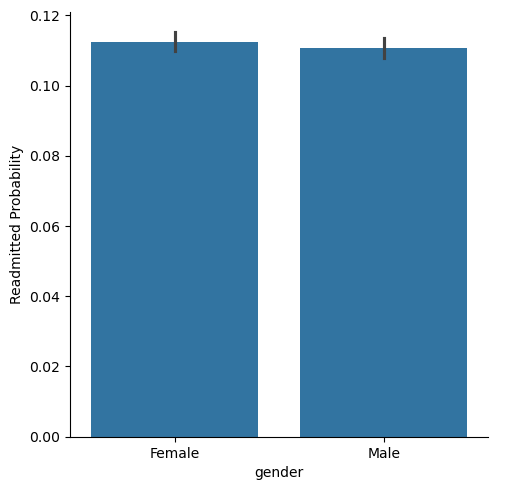

In [50]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabet, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

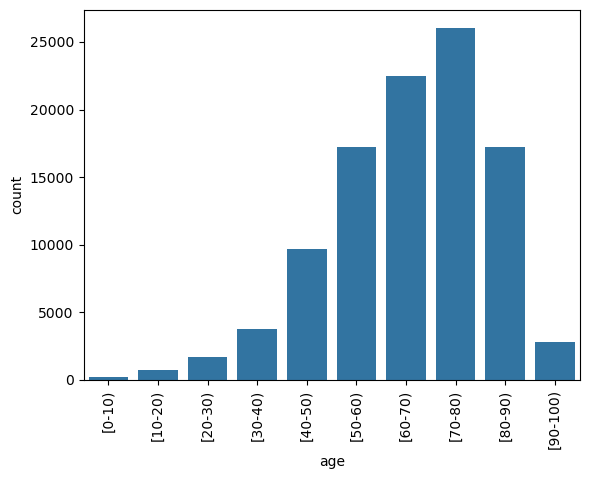

In [52]:
sns.countplot(x="age", data = diabet)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_38352\1692502812.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet.age = diabet.age.replace({"[70-80)":75,


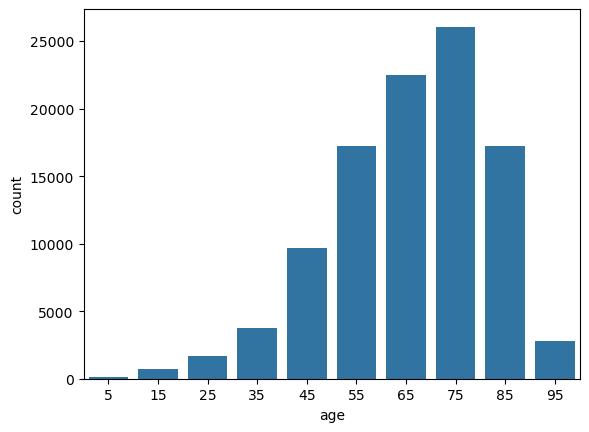

In [54]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabet)
#plt.xticks(rotation = 90)
plt.show()

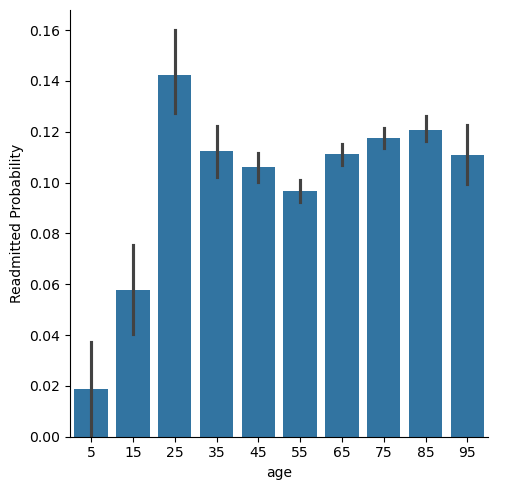

In [56]:
g = sns.catplot(x = "age", y = "readmitted", data = diabet, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

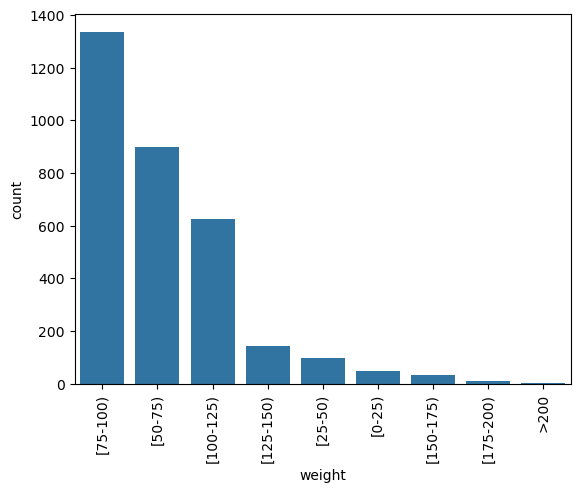

In [58]:
sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_38352\2920382224.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabet["weight"]=diabet["weight"].replace({"[75-100)":85,


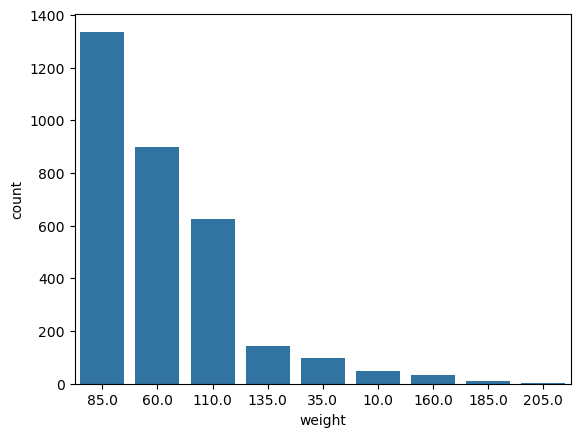

Proportions of Weights
weight
85.0     41.789177
60.0     28.057554
110.0    19.549578
135.0     4.535502
35.0      3.034094
10.0      1.501408
160.0     1.094776
185.0     0.344073
205.0     0.093838
Name: proportion, dtype: float64


In [60]:
diabet["weight"]=diabet["weight"].replace({"[75-100)":85,
                             "[50-75)":60,
                             "[100-125)":110,
                             "[125-150)":135,
                             "[25-50)":35,
                             "[0-25)":10,
                             "[150-175)":160,
                             "[175-200)":185,
                             ">200":205})

sns.countplot(x = "weight", data = diabet,
            order = diabet.weight.value_counts().index)
plt.show()

print("Proportions of Weights")
print(diabet.weight.value_counts(normalize=True)*100)

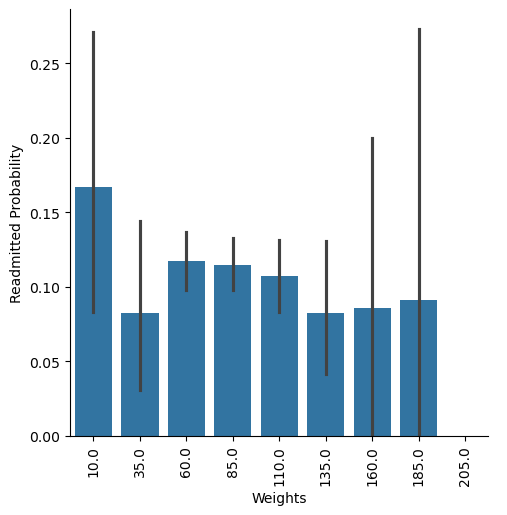

In [62]:
g = sns.catplot(x = "weight", y = "readmitted",
                kind = "bar", data = diabet, height = 5)
g.set_xticklabels(rotation = 90)
g.set_ylabels("Readmitted Probability")
g.set_xlabels("Weights")
plt.show()

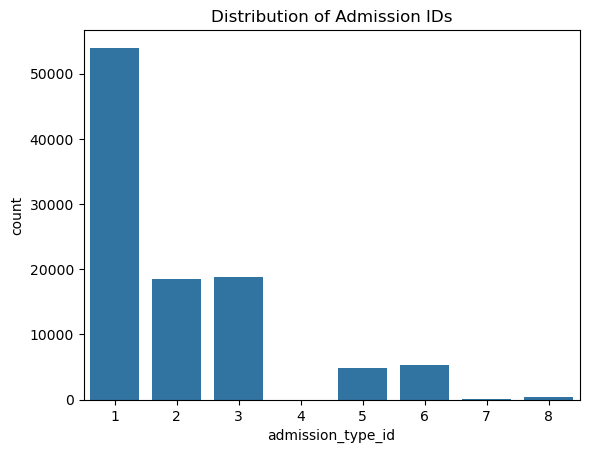

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


In [64]:
sns.countplot(x = "admission_type_id", data = diabet)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

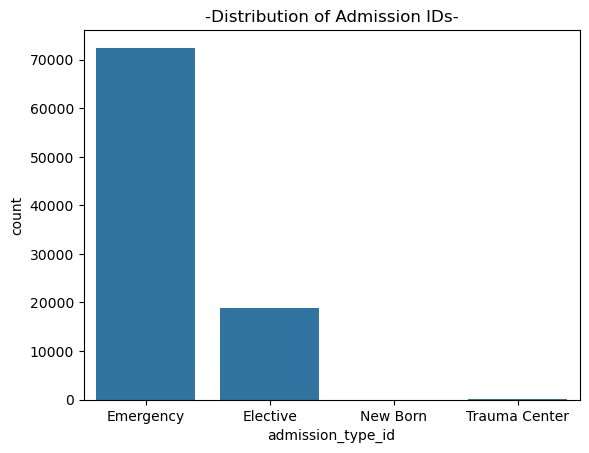

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


In [68]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = diabet)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

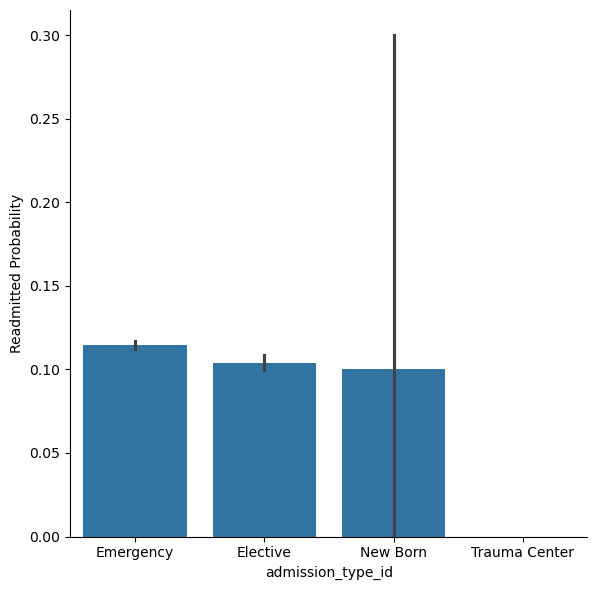

In [70]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabet, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()